In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchinfo import summary
import random

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device being used: {device}")

Device being used: cuda


In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.Flowers102(
    root='data', split='train', transform=transform, download=True)
test_dataset = datasets.Flowers102(
    root='data', split='test', transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128)

In [4]:
print(len(train_dataset))
print(len(train_loader))
print(len(test_dataset))
print(len(test_loader))

1020
8
6149
49


In [5]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(16, 8, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),

            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )
    
    def forward(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded

model = AutoEncoder().to(device)
summary(model, input_size=(128, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
AutoEncoder                              [128, 3, 64, 64]          --
├─Sequential: 1-1                        [128, 8, 16, 16]          --
│    └─Conv2d: 2-1                       [128, 16, 64, 64]         448
│    └─ReLU: 2-2                         [128, 16, 64, 64]         --
│    └─MaxPool2d: 2-3                    [128, 16, 32, 32]         --
│    └─Conv2d: 2-4                       [128, 8, 32, 32]          1,160
│    └─ReLU: 2-5                         [128, 8, 32, 32]          --
│    └─MaxPool2d: 2-6                    [128, 8, 16, 16]          --
├─Sequential: 1-2                        [128, 3, 64, 64]          --
│    └─ConvTranspose2d: 2-7              [128, 16, 32, 32]         1,168
│    └─ReLU: 2-8                         [128, 16, 32, 32]         --
│    └─ConvTranspose2d: 2-9              [128, 3, 64, 64]          435
│    └─Sigmoid: 2-10                     [128, 3, 64, 64]          --
Total p

In [6]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
num_epochs = 50
progress_bar = tqdm(range(1, num_epochs + 1), desc="Epochs")


for epoch in progress_bar:
    model.train()
    running_loss = 0.0
    
    print("------------------------------------------------------------------------------------------")
    epoch_progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch: {epoch}")
    for batch_idx, (images, _) in epoch_progress_bar:
        images = images.to(device)

        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    print(f"Epoch [{epoch}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

------------------------------------------------------------------------------------------


Epoch: 1:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/50], Loss: 0.0846
------------------------------------------------------------------------------------------


Epoch: 2:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/50], Loss: 0.0834
------------------------------------------------------------------------------------------


Epoch: 3:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/50], Loss: 0.0820
------------------------------------------------------------------------------------------


Epoch: 4:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/50], Loss: 0.0797
------------------------------------------------------------------------------------------


Epoch: 5:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/50], Loss: 0.0758
------------------------------------------------------------------------------------------


Epoch: 6:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/50], Loss: 0.0697
------------------------------------------------------------------------------------------


Epoch: 7:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/50], Loss: 0.0612
------------------------------------------------------------------------------------------


Epoch: 8:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/50], Loss: 0.0505
------------------------------------------------------------------------------------------


Epoch: 9:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/50], Loss: 0.0396
------------------------------------------------------------------------------------------


Epoch: 10:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/50], Loss: 0.0328
------------------------------------------------------------------------------------------


Epoch: 11:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [11/50], Loss: 0.0289
------------------------------------------------------------------------------------------


Epoch: 12:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [12/50], Loss: 0.0263
------------------------------------------------------------------------------------------


Epoch: 13:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [13/50], Loss: 0.0245
------------------------------------------------------------------------------------------


Epoch: 14:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [14/50], Loss: 0.0230
------------------------------------------------------------------------------------------


Epoch: 15:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [15/50], Loss: 0.0217
------------------------------------------------------------------------------------------


Epoch: 16:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [16/50], Loss: 0.0205
------------------------------------------------------------------------------------------


Epoch: 17:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [17/50], Loss: 0.0193
------------------------------------------------------------------------------------------


Epoch: 18:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [18/50], Loss: 0.0182
------------------------------------------------------------------------------------------


Epoch: 19:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [19/50], Loss: 0.0173
------------------------------------------------------------------------------------------


Epoch: 20:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [20/50], Loss: 0.0165
------------------------------------------------------------------------------------------


Epoch: 21:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [21/50], Loss: 0.0157
------------------------------------------------------------------------------------------


Epoch: 22:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [22/50], Loss: 0.0151
------------------------------------------------------------------------------------------


Epoch: 23:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [23/50], Loss: 0.0143
------------------------------------------------------------------------------------------


Epoch: 24:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [24/50], Loss: 0.0137
------------------------------------------------------------------------------------------


Epoch: 25:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [25/50], Loss: 0.0131
------------------------------------------------------------------------------------------


Epoch: 26:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [26/50], Loss: 0.0125
------------------------------------------------------------------------------------------


Epoch: 27:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [27/50], Loss: 0.0120
------------------------------------------------------------------------------------------


Epoch: 28:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [28/50], Loss: 0.0115
------------------------------------------------------------------------------------------


Epoch: 29:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [29/50], Loss: 0.0112
------------------------------------------------------------------------------------------


Epoch: 30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [30/50], Loss: 0.0109
------------------------------------------------------------------------------------------


Epoch: 31:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [31/50], Loss: 0.0106
------------------------------------------------------------------------------------------


Epoch: 32:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [32/50], Loss: 0.0104
------------------------------------------------------------------------------------------


Epoch: 33:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [33/50], Loss: 0.0101
------------------------------------------------------------------------------------------


Epoch: 34:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [34/50], Loss: 0.0099
------------------------------------------------------------------------------------------


Epoch: 35:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [35/50], Loss: 0.0097
------------------------------------------------------------------------------------------


Epoch: 36:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [36/50], Loss: 0.0096
------------------------------------------------------------------------------------------


Epoch: 37:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [37/50], Loss: 0.0094
------------------------------------------------------------------------------------------


Epoch: 38:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [38/50], Loss: 0.0093
------------------------------------------------------------------------------------------


Epoch: 39:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [39/50], Loss: 0.0091
------------------------------------------------------------------------------------------


Epoch: 40:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [40/50], Loss: 0.0090
------------------------------------------------------------------------------------------


Epoch: 41:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [41/50], Loss: 0.0089
------------------------------------------------------------------------------------------


Epoch: 42:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [42/50], Loss: 0.0088
------------------------------------------------------------------------------------------


Epoch: 43:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [43/50], Loss: 0.0087
------------------------------------------------------------------------------------------


Epoch: 44:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [44/50], Loss: 0.0086
------------------------------------------------------------------------------------------


Epoch: 45:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [45/50], Loss: 0.0085
------------------------------------------------------------------------------------------


Epoch: 46:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [46/50], Loss: 0.0084
------------------------------------------------------------------------------------------


Epoch: 47:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [47/50], Loss: 0.0083
------------------------------------------------------------------------------------------


Epoch: 48:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [48/50], Loss: 0.0082
------------------------------------------------------------------------------------------


Epoch: 49:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [49/50], Loss: 0.0082
------------------------------------------------------------------------------------------


Epoch: 50:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch [50/50], Loss: 0.0081


In [8]:
torch.save(model.state_dict(), 'conv_autoencoder.pth')

model.eval()
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        recon = model(data)
        break

<Figure size 1600x1200 with 0 Axes>

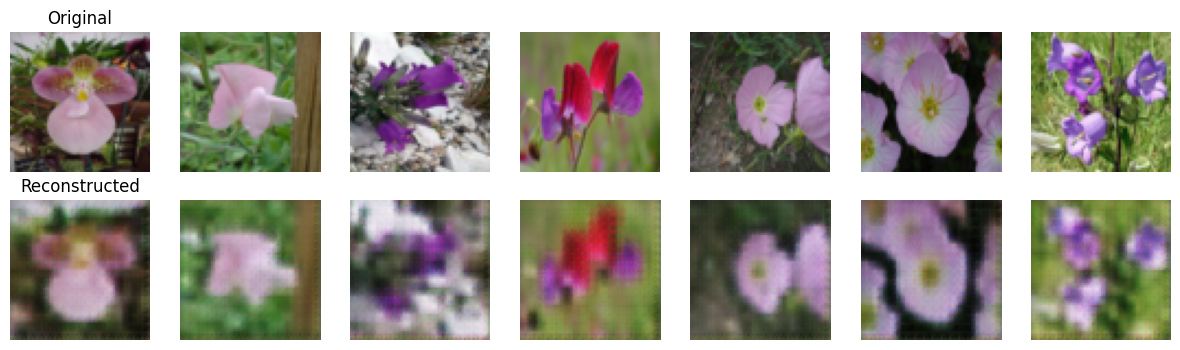

In [11]:
plt.figure(dpi=250)
fig, ax = plt.subplots(2, 7, figsize=(15, 4))
for i in range(7):
    r = random.randint(0, len(data) - 1)
    ax[0, i].imshow(data[r].cpu().numpy().transpose((1, 2, 0)))
    ax[0, i].axis('off')
    ax[1, i].imshow(recon[r].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].axis('off')
ax[0, 0].set_title('Original')
ax[1, 0].set_title('Reconstructed')
plt.show()